In [ ]:
import time
start_time = time.perf_counter()

## Versions, housekeeping

In [2]:
%matplotlib inline
# version check
import numpy
print('The numpy version is {}.'.format(numpy.__version__))
import pandas
print('The pandas version is {}.'.format(pandas.__version__))
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import matplotlib
print('The matplotlib version is {}.'.format(matplotlib.__version__))
import regex
print('The regex version is {}.'.format(regex.__version__))
import scipy
print('The scipy version is {}.'.format(scipy.__version__))

The numpy version is 1.18.1.
The pandas version is 1.0.4.
The scikit-learn version is 0.23.1.
The matplotlib version is 3.2.1.
The regex version is 2.5.80.
The scipy version is 1.4.1.


In [3]:
# set random state for reproducibility
random_state = 42

# view number of output entries
view_n_entries = 5

# default numpy settings
import numpy as np
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 80

# update settings
import numpy as np
np.set_printoptions(edgeitems=15, linewidth=150, 
    formatter=dict(float=lambda x: "%.2f" % x))

# update pandas settings
import pandas as pd
pd.set_option('max_colwidth', 150)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 150
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# system
import sys
#sys.getsizeof

# timeit
import timeit

## Plotting Functions

In [4]:
# plotting functions
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("notebook")

def get_character_counts(df, col='m_body', new_name='n_char'):
    A = np.array(df.loc[:, col]) 
    getlength = np.vectorize(len)
    df[new_name] = getlength(A)
    return df

def plot_ecdf(x, xlab='', ylab='', title='', color=None, xlim=None, ylim=None, logx=False, logy=False, hline=None, vline=None, alpha=1, s=1):
    x = np.sort(x)
    n = x.size
    y = np.arange(1, n+1) / n
    plt.scatter(x, y, color=color, s=s, alpha=alpha)
    plt.xlabel(xlab, fontsize=14)
    plt.ylabel(ylab, fontsize=14)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)
    if logx == True:
        plt.xscale('log')
    if logy == True:
        plt.yscale('log')
    if hline is not None:
        plt.axhline(hline, color='r', linestyle='--')
    if vline is not None:
        plt.axvline(vline, color='r', linestyle='--')

def plot_scatter(x, y, xlab='', ylab='', title='', logx=False, logy=False, hline=None, vline=None, s=None):
    plt.scatter(x, y, alpha=0.25)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    if logx == True:
        plt.xscale('log')
    if logy == True:
        plt.yscale('log')
    if hline is not None:
        plt.axhline(hline, color='r', linestyle='--')
    if vline is not None:
        plt.axvline(vline, color='r', linestyle='--')

def plot_2_2(x, y, suptitle='', hline=None, vline=None):
    plt.figure(figsize=(10,10))

    plt.subplot(2, 2, 1)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 1: linx, liny', logx=False, logy=False, hline=None, vline=None)
    plt.subplot(2, 2, 2)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 2: linx, logy', logx=False, logy=True, hline=None, vline=None)
    plt.subplot(2, 2, 3)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 3: linx, liny', logx=True, logy=False, hline=None, vline=None)
    plt.subplot(2, 2, 4)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 4: linx, logy', logx=True, logy=True, hline=None, vline=None)

    plt.suptitle(suptitle, fontsize=16)
    plt.show() 

def plot_2_4(_, suptitle='', hline=None, vline=None):
    plt.figure(figsize=(20,10))

    plt.subplot(2, 4, 1)
    _.plot(kind='hist', bins=30, title='Plot 1: linx, liny', logx=False, logy=False)
    plt.subplot(2, 4, 2)
    _.plot(kind='hist', bins=30, title='Plot 2: linx, logy', logx=False, logy=True)
    plt.subplot(2, 4, 3)
    plot_ecdf(_, xlab='', ylab='', title='Plot 3: linx, liny', logx=False, logy=False, hline=None, vline=None)
    plt.subplot(2, 4, 4)
    plot_ecdf(_, xlab='', ylab='', title='Plot 4: linx, logy', logx=False, logy=True, hline=None, vline=None)
    plt.subplot(2, 4, 5)
    _.plot(kind='hist', bins=30, title='Plot 5: logx, liny', logx=True, logy=False)
    plt.subplot(2, 4, 6)
    _.plot(kind='hist', bins=30, title='Plot 6: logx, logy', logx=True, logy=True)
    plt.subplot(2, 4, 7)
    plot_ecdf(_, xlab='', ylab='', title='Plot 7: logx, liny', logx=True, logy=False, hline=None, vline=None)
    plt.subplot(2, 4, 8)
    plot_ecdf(_, xlab='', ylab='', title='Plot 8: logx, logy', logx=True, logy=True, hline=None, vline=None)
    plt.suptitle(suptitle, fontsize=16)
    plt.show()   

    
def plot_sender_stats(df, n, suptitle=''):
    plt.figure(figsize=(14, 12))
    plt.subplot(2, 2, 1) # plot 1: horizontal bar
    _ = pd.DataFrame(df.groupby(['m_from']).size()).sort_values(0,ascending=False).reset_index() # convert data
    l = np.array(_.iloc[:,0]) # labels
    v = np.array(_.iloc[:,1]) # values
    plt.barh(np.linspace(n,1,n), v[:n], tick_label=l[:n])
    plt.subplot(2, 2, 2) # plot 2: full histogram
    plt.hist(v, bins=30)
    plt.yscale('log')
    plt.subplot(2, 2, 3) # plot 3: pie
    pie_x = [len(df[df.gender == 0].m_from.unique()), len(df[df.gender == 1].m_from.unique())]
    pie_lab = ['boy: %d email addresses' % (pie_x[0]), 'girl: %d email addresses' % (pie_x[1])]
    plt.pie(pie_x, labels=pie_lab, autopct='%.2f%%', colors=['#347DC1', '#FF85A2'])
    plt.subplot(2, 2, 4) # plot 4: ecdf
    plot_ecdf(v, xlim=(0,stats.scoreatpercentile(v,95)))
    plt.suptitle(suptitle)
    plt.show()
    print(_.describe())
    print(stats.describe(v))
    
def plot_character_frequency(df, suptitle=''):
    v = np.array(df.n_characters_start.values) # values
    plt.figure(figsize=(18,6))
    plt.subplot(1, 3, 1) # plot 1: pie chart
    pie_x = [df[df.gender == 0].n_characters_start.sum(),df[df.gender == 1].n_characters_start.sum()]
    pie_lab = ['boy: %.3g characters' % (pie_x[0]), 'girl: %.3g characters' % (pie_x[1])]
    plt.pie(pie_x, labels=pie_lab, autopct='%.2f%%', colors=['#347DC1', '#FF85A2'])
    plt.subplot(1, 3, 2) # plot 2: full histogram
    plt.hist(v, bins=30)
    plt.yscale('log')
    plt.subplot(1, 3, 3) # plot 3: ecdf
    plot_ecdf(v, xlim=(0,stats.scoreatpercentile(v,95)))
    plt.show()
    print(df.n_characters_start.describe())
    print(stats.describe(v))
    

    
def plot_gender_character_frequency(df, col='m_body', new_name='n_char', suptitle='', alpha=0.1,):
    df = get_character_counts(df, col=col, new_name=new_name)
    bv = np.array(df[df.gender == 0][new_name].values) # values
    gv = np.array(df[df.gender == 1][new_name].values) # values
    plt.figure(figsize=(18,6))
    plt.subplot(1, 3, 1) # plot 1: pie chart
    pie_x = [np.sum(bv), np.sum(gv)]
    pie_lab = ['boy: %dM characters' % (pie_x[0]/1000000), 'girl: %dM characters' % (pie_x[1]/1000000)]
    plt.pie(pie_x, labels=pie_lab, autopct='%.2f%%', colors=['#347DC1', '#FF85A2'])
    plt.subplot(1, 3, 2) # plot 2: full histogram
    plt.hist(x=[bv, gv], bins=10, color=['#347DC1', '#FF85A2'], rwidth=1,)
    #plt.hist(gv, bins=30, color='#FF85A2')
    plt.yscale('log')
    plt.subplot(1, 3, 3) # plot 3: ecdf
    plot_ecdf(bv, xlim=(0,stats.scoreatpercentile(bv,97)), color='#347DC1', alpha=.5, s=.1)
    plot_ecdf(gv, xlim=(0,stats.scoreatpercentile(gv,97)), color='#FF85A2', alpha=.25, s=.1)
    plt.suptitle(suptitle.upper())
    plt.tight_layout()
    plt.show()
    
    bd = df[df.gender == 0][new_name].describe()
    bd.name = 'boy'
    gd = df[df.gender == 1][new_name].describe()
    gd.name = 'girl'
    bg_describe = pd.concat([bd, gd], axis=1)
    print(bg_describe)

### Threadpool executor for this notebook's user functions

In [5]:
%%time
def threadpool_executor(io_func=None, df=None, series=None, merge_back=False, idict=None, new_name=None):
    """Use this to pass a dataframe series to the threadpool executor to trigger async processessing. Make sure the user function (io_func) meets the following conditions:
    - Receives two arguments: series index position & series values
    - Has an output dictionary that assembles the index, values as key, values for reassembly
    - Output dictionary is set as the return by name within the called function
    
    io_func: user function to pass to threadpoolexecutor; df: dataframe with data; series: string name of column; idict: dictionary linked to user function to catch output values; new_name: string for new column name
    when reassigning values back to the main dataframe"""
    
    if (io_func is None) | (df is None) | (series is None):
        sys.exit("'None' received as input for either io_func, df, or series. Please assign a value and try again.")
    if (merge_back is True) & (idict is None):
        sys.exit("'merge_back is set to True. However, no dictionary has been passed to capture output. Please set the idict= argument to an initialized dictionary and try again.'")
    
    import concurrent.futures
    with concurrent.futures.ThreadPoolExecutor() as executor:  
        executor.map(io_func, df[series].index, df[series])
    
    if merge_back == True: # will merge the processed values back to the initial dataframe
        if idict is not None:
            new_frame = pd.DataFrame.from_dict(idict, orient='index')
            if new_name is not None:
                new_frame.columns = [new_name]
                df = pd.merge(df, new_frame, how='left', left_index=True, right_index=True, copy=False)
            else:
                sys.exit("Merge back is True, but no series or name for a new column has been received. If a new column is desired, please pass a new_name. Otherwise, please pass, 'series' to merge_back to replace the current series.")
    if merge_back == 'series': # will drop the old series and replace it with the new processed documents
        df = df.drop(series, axis=1)
        new_frame = pd.DataFrame.from_dict(idict, orient='index')
        new_frame.columns = [series]
        df = pd.merge(df, new_frame, how='left', left_index=True, right_index=True, copy=False)
            
    return df

Wall time: 0 ns


# Notebook Overview
In this notebook we'll look at outliers for character counts

# Import dataframe

In [6]:
Dataset_directory = './data/enron/preprocess_data.csv'
df = pd.read_csv(Dataset_directory, index_col=0)

In [7]:
df.head(2)

,f_dir,m_id,m_date,m_from,m_to,m_cc,m_bcc,m_subj,mime_vers,cont_type,encode,x_from,x_to,x_cc,x_bcc,x_fold,x_orig,x_fname,o_body,m_body,gender,n_emails_sent,n_characters_start,clean_char,n_char,clean_body,preprocessed_body
0,./data/enron/maildir/derrick-j/sent_items/247,<3600822.1075845098335.JavaMail.evans@thyme>,"Fri, 6 Apr 2001 11:54:21 -0700 (PDT)",james.derrick@enron.com,jvd024@hotmail.com,NaN,NaN,RE:,1.00,text/plain; charset=ANSI_X3.4-1968,7bit,"Derrick Jr., James </O=ENRON/OU=NA/CN=RECIPIENTS/CN=JDERRIC>","'""Jimi Derrick"" <jvd024@hotmail.com>@ENRON' <IMCEANOTES-+22Jimi+20Derrick+22+20+3Cjvd024+40hotmail+2Ecom+3E+40ENRON@ENRON.com>",NaN,NaN,"\Derrick Jr., James\Derrick Jr., James\Sent Items",DERRICK-J,"Derrick Jr., James.pst\n\n","Message-ID: <3600822.1075845098335.JavaMail.evans@thyme>\nDate: Fri, 6 Apr 2001 11:54:21 -0700 (PDT)\nFrom: james.derrick@enron.com\nTo: jvd024@ho...","Jimbo, thank you for the message. I, too, have great, ever-lasting memories of our times together in Spain and Scottsdale. I am confident that th...",0.00,909,1859,461,461,"Jimbo, thank you for the message. I, too, have great, ever-lasting memories of our times together in Spain and Scottsdale. I am confident that th...",jimbo thank you for the message too have great ever lasting memories of our times together in spain and scottsdale am confident that there will be...
1,./data/enron/maildir/hain-m/_sent_mail/345,<15254140.1075860479847.JavaMail.evans@thyme>,"Mon, 16 Oct 2000 06:54:00 -0700 (PDT)",mary.hain@enron.com,"christi.nicolay@enron.com, robert.frank@enron.com, james.steffes@enron.com,",NaN,NaN,Re: Stranded costs,1.00,text/plain; charset=us-ascii,7bit,Mary Hain,"Christi L Nicolay, Robert Frank, James D Steffes, Harry Kingerski, Joe Hartsoe, Sarah Novosel, Donna Fulton, Paul Kaufman",NaN,NaN,\Mary_Hain_Aug2000_Jul2001\Notes Folders\'sent mail,Hain-M,mary-hain.nsf\n\n,"Message-ID: <15254140.1075860479847.JavaMail.evans@thyme>\nDate: Mon, 16 Oct 2000 06:54:00 -0700 (PDT)\nFrom: mary.hain@enron.com\nTo: christi.nic...","I have tracked down an old memo written by the Chief Counsel of Federal \nAffairs for Niagara Mohawk, summarizing positions taken in requests for ...",1.00,1456,6241,562,562,"I have tracked down an old memo written by the Chief Counsel of Federal \nAffairs for Niagara Mohawk, summarizing positions taken in requests for ...",have tracked down an old memo written by the chief counsel of federal affairs for niagara mohawk summarizing positions taken in requests for rehe...


## Global Variables for DataFrame Columns

In [8]:
Corpus_series = 'preprocessed_body'
Target_series = 'gender'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139283 entries, 0 to 139282
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   f_dir               139283 non-null  object 
 1   m_id                139283 non-null  object 
 2   m_date              139283 non-null  object 
 3   m_from              139283 non-null  object 
 4   m_to                136997 non-null  object 
 5   m_cc                44984 non-null   object 
 6   m_bcc               42944 non-null   object 
 7   m_subj              133440 non-null  object 
 8   mime_vers           139283 non-null  float64
 9   cont_type           139283 non-null  object 
 10  encode              139283 non-null  object 
 11  x_from              139283 non-null  object 
 12  x_to                137591 non-null  object 
 13  x_cc                43246 non-null   object 
 14  x_bcc               117 non-null     object 
 15  x_fold              139283 non-nul

## Character Counts

In [10]:
len(df[(df[Corpus_series].isna())])

0

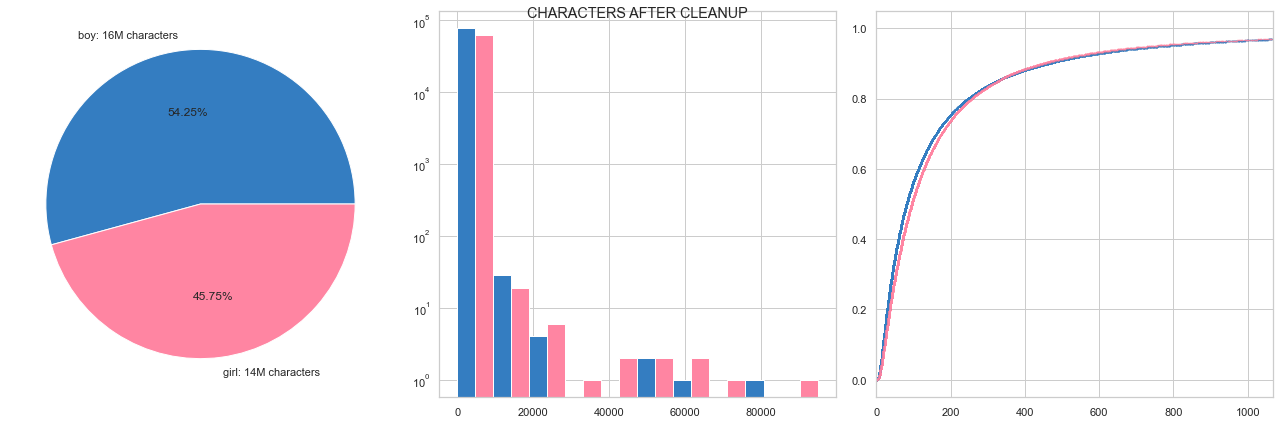

           boy     girl
count 77155.00 62128.00
mean    216.23   226.43
std     698.22   875.90
min       1.00     1.00
25%      35.00    43.00
50%      81.00    95.00
75%     197.00   209.00
max   81643.00 94855.00
Wall time: 1.38 s


In [11]:
%%time
plot_gender_character_frequency(df, col=Corpus_series, new_name='clean_char', suptitle='Characters After Cleanup', alpha=0.1)

## Total Character Statistics

In [12]:
df.clean_char.describe()

count   139283.00
mean       220.78
std        782.49
min          1.00
25%         39.00
50%         88.00
75%        203.00
max      94855.00
Name: clean_char, dtype: float64

### Character Sums by Email Sender

In [13]:
three_sigma = np.mean(df.clean_char) + (np.std(df.clean_char))*3
df[(df.clean_char > three_sigma)].groupby(['m_from', 'clean_char']).sum().sort_values('clean_char', ascending=False)[:5]

,,mime_vers,gender,n_emails_sent,n_characters_start,n_char
m_from,clean_char,,,,,
angela.wilson@enron.com,94855,1.00,1.00,26,161617,151981
gus.perez@enron.com,81643,1.00,0.00,18,142153,134179
angela.wilson@enron.com,67456,1.00,1.00,26,117486,110955
gus.perez@enron.com,63094,1.00,0.00,18,110102,104091
angela.wilson@enron.com,58220,1.00,1.00,26,104273,98351


## Dropping Character Count > 3 Sigma, Referencing Total Corpus

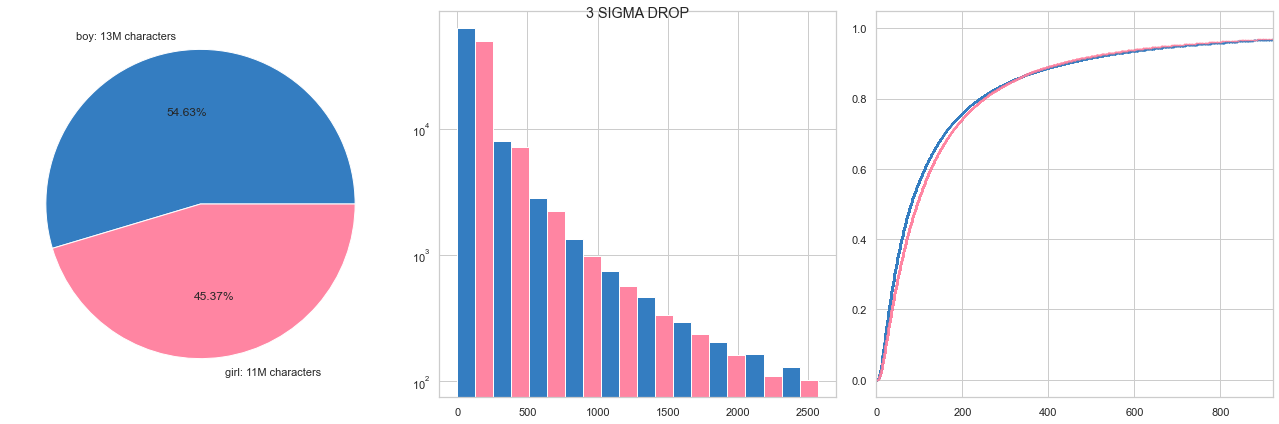

           boy     girl
count 76597.00 61665.00
mean    180.93   186.65
std     289.02   279.92
min       1.00     1.00
25%      35.00    43.00
50%      80.00    94.00
75%     192.00   205.00
max    2565.00  2557.00


In [14]:
three_sigma = np.mean(df.clean_char) + (np.std(df.clean_char))*3
_ = df[(df.clean_char > three_sigma)].index
plot_gender_character_frequency(df.drop(_), col=Corpus_series, new_name='clean_char', suptitle='3 Sigma Drop', alpha=0.1)

## Make Reduction

In [15]:
three_sigma = np.mean(df.clean_char) + (np.std(df.clean_char))*3
df = df[(df.clean_char <= three_sigma)]

### Resample, reindex

In [16]:
def resample_frame(df, random_state=random_state):
    df = df.sample(n=len(df), random_state=random_state).reset_index(drop=True)
    return df
df = resample_frame(df) # resampled

### Output

In [17]:
df.to_csv('./data/enron/clean_clean_outliers.csv')

### End

In [18]:
end_time = time.perf_counter()
print('Run time: %.1fs (~%dm)' % ((end_time-start_time, (end_time-start_time)/60)))

Run time: 20.2s (~0m)
